In [1]:
! ..\transformer-env\Script\activate
! pip install -r requirements.txt
! pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124
! pip freeze

Impossibile trovare il percorso specificato.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://download.pytorch.org/whl/cu124
  Using cached https://download.pytorch.org/whl/cu124/torchvision-0.19.1%2Bcu124-cp312-cp312-win_amd64.whl (5.9 MB)
  Using cached https://download.pytorch.org/whl/cu124/torchaudio-2.4.1%2Bcu124-cp312-cp312-win_amd64.whl (4.1 MB)
     ---------------------------------------- 0.0/2.5 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.5 GB 6.3 MB/s eta 0:06:40
     ---------------------------------------- 0.0/2.5 GB 12.7 MB/s eta 0:03:17
     ---------------------------------------- 0.0/2.5 GB 29.8 MB/s eta 0:01:24
     ---------------------------------------- 0.0/2.5 GB 39.9 MB/s eta 0:01:03
     ---------------------------------------- 0.0/2.5 GB 34.1 MB/s eta 0:01:14
     ---------------------------------------- 0.0/2.5 GB 26.6 MB/s eta 0:01:34
     ---------------------------------------- 0.0/2.5 GB 28.3 MB/s eta 0:01:29
     ---------------------------------------- 0.0/2.5 GB 40.9 MB/s eta 0:01:01
     ----


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


absl-py==2.1.0
asttokens==2.4.1
astunparse==1.6.3
certifi==2024.8.30
charset-normalizer==3.3.2
colorama==0.4.6
comm==0.2.2
contourpy==1.3.0
cycler==0.12.1
debugpy==1.8.6
decorator==5.1.1
executing==2.1.0
filelock==3.16.1
flatbuffers==24.3.25
fonttools==4.54.1
fsspec==2024.9.0
gast==0.6.0
google-pasta==0.2.0
grpcio==1.66.2
h5py==3.12.1
huggingface-hub==0.25.1
idna==3.10
ipykernel==6.29.5
ipython==8.28.0
jedi==0.19.1
Jinja2==3.1.4
joblib==1.4.2
jupyter_client==8.6.3
jupyter_core==5.7.2
keras==3.6.0
kiwisolver==1.4.7
libclang==18.1.1
Markdown==3.7
markdown-it-py==3.0.0
MarkupSafe==2.1.5
matplotlib==3.9.2
matplotlib-inline==0.1.7
mdurl==0.1.2
ml-dtypes==0.4.1
mpmath==1.3.0
namex==0.0.8
nest-asyncio==1.6.0
networkx==3.3
numpy==1.26.4
opt_einsum==3.4.0
optree==0.13.0
packaging==24.1
pandas==2.2.3
parso==0.8.4
pillow==10.4.0
platformdirs==4.3.6
prompt_toolkit==3.0.48
protobuf==4.25.5
psutil==6.0.0
pure_eval==0.2.3
Pygments==2.18.0
pyparsing==3.1.4
python-dateutil==2.9.0.post0
pytz==2024.2
pyw

In [2]:
!curl -o "AirlineTweet.csv" "https://lazyprogrammer.me/course_files/AirlineTweets.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 3341k  100 3341k    0     0  10.1M      0 --:--:-- --:--:-- --:--:-- 10.2M


In [3]:
from transformers import pipeline
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

C:\Users\emili\Desktop\transformers_course\transformers-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Uso base: creo un modello
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [5]:
type(classifier)

transformers.pipelines.text_classification.TextClassificationPipeline

In [6]:
classifier("This is a great moovie!")

[{'label': 'POSITIVE', 'score': 0.9974959492683411}]

In [7]:
classifier("This moovie is not interesting!")

[{'label': 'NEGATIVE', 'score': 0.999811589717865}]

In [8]:
classifier("This moovie is  interesting!")

[{'label': 'POSITIVE', 'score': 0.999646782875061}]

In [9]:
classifier("I can't say that this was a good moovie")

[{'label': 'NEGATIVE', 'score': 0.9953739047050476}]

In [10]:
classifier([
    "This course is just what I needed",
    "I can't understand anything of this. The instructor keep telling me to meet the prerequisites. What are the prerequisites??"
])

[{'label': 'POSITIVE', 'score': 0.9993026256561279},
 {'label': 'NEGATIVE', 'score': 0.9854984283447266}]

In [14]:
import torch
torch.cuda.is_available()

True

In [15]:
# 0 è "l'indice" della GPU. Useremo questo nella nostra pipeline
torch.cuda.current_device()

0

In [17]:
classifier = pipeline("sentiment-analysis", device=0)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [26]:
df_ = pd.read_csv("AirlineTweet.csv")
df_.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [23]:
df = df_[["airline_sentiment", "text"]]

In [24]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

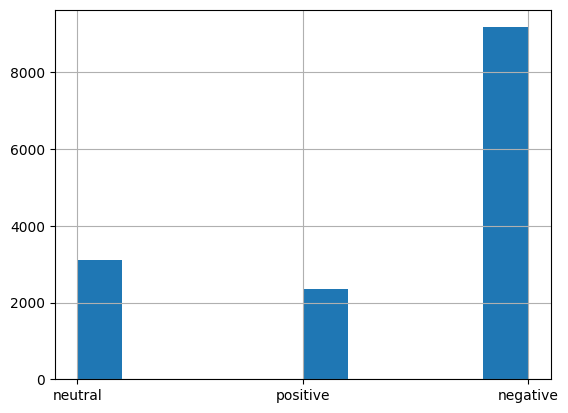

In [28]:
# Abbiamo un bilanciamento negativo del dataset: abbiamo molti tweet negativi
df["airline_sentiment"].hist()

In [29]:
df=df[df.airline_sentiment != "neutral"].copy()

In [30]:
target_map = {"positive": 1, "negative": 0}
df["target"] = df["airline_sentiment"].map(target_map)

In [31]:
df.head()

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [37]:
texts = df["text"].to_list()
predictions = classifier(texts)

In [40]:
predictions[:10]

[{'label': 'POSITIVE', 'score': 0.6070815324783325},
 {'label': 'NEGATIVE', 'score': 0.9973449110984802},
 {'label': 'NEGATIVE', 'score': 0.9995823502540588},
 {'label': 'NEGATIVE', 'score': 0.9854250550270081},
 {'label': 'POSITIVE', 'score': 0.9553211331367493},
 {'label': 'POSITIVE', 'score': 0.9827088117599487},
 {'label': 'POSITIVE', 'score': 0.9994851350784302},
 {'label': 'POSITIVE', 'score': 0.9993509650230408},
 {'label': 'POSITIVE', 'score': 0.9940821528434753},
 {'label': 'POSITIVE', 'score': 0.9863133430480957}]

In [43]:
# Siccome i nostri dati sono sbilanciati, è bene valutare con metriche come l'AUC per la ROC curve
"""
Lo score che abbiamo tirato fuori, però, è uno score che si inverte: quando è 1 per la positive class, significa che è 1 per la positive
e 0 per la negative. Viceversa, con score 1 quando la class è negative, allora avremo 1 per la negative e 0 per la positive.
Per calcolare correttamente il grado di accuratezza, dobbiamo riportare gli score sotto un unico metro di paragone: 1 per positive, 0 per negative

"""
probs = [p["score"] if p["label"].startswith("P") else 1-p["score"] for  p in predictions]

In [45]:
probs[:10]

[0.6070815324783325,
 0.0026550889015197754,
 0.0004176497459411621,
 0.014574944972991943,
 0.9553211331367493,
 0.9827088117599487,
 0.9994851350784302,
 0.9993509650230408,
 0.9940821528434753,
 0.9863133430480957]

In [48]:
preds = np.array([1 if p["label"].startswith("P") else 0 for p in predictions])

In [47]:
preds[:10]

[1, 0, 0, 0, 1, 1, 1, 1, 1, 1]

In [50]:
# Accuratezza semplice come media sul totale delle predizioni azzeccate. Tuttavia non conosciamo le previsioni corrette
print("acc: ", np.mean(df["target"] == preds))

acc:  0.8898708950697514


In [52]:
cm = confusion_matrix(df["target"], preds, normalize="true")
cm

array([[0.90117673, 0.09882327],
       [0.15404147, 0.84595853]])

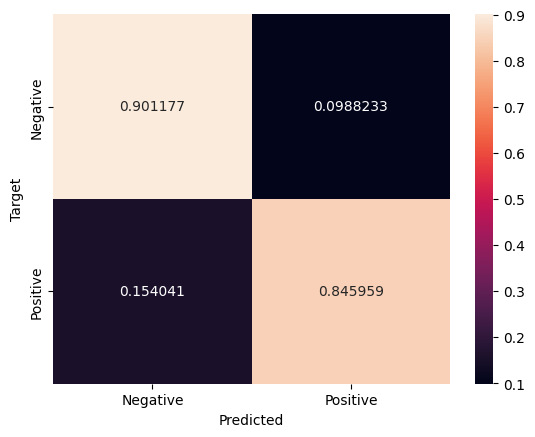

In [57]:
def plot_cm(cm):
    classes = ["Negative", "Positive"]
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt="g")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")

plot_cm(cm)

In [58]:
# L'f1 score è definito come media armonica tra precision e recall
# Questo punteggio, attualmente, è valido per la classe positiva
# E' asimmetrico perchè le classi sono sbilanciate.
f1_score(df["target"], preds)

0.758777756690074

In [60]:
# vediamo per la classe negativa
# L'f1 score dipende molto da quale delle label abbiamo usato per assegnare 0 o 1
f1_score(1-df["target"], 1-preds)

0.928647616908999

In [63]:
# Una misura migliore è la ROC AUC che non è sensitiva al significato delle label: vediamo
roc_auc_score(df["target"], probs)

0.9485934921195112

In [65]:
roc_auc_score(1-df["target"], 1-np.array(probs))

0.9485934921195112